<a href="https://colab.research.google.com/github/kushagra58/pyhton-with-Ml/blob/main/python3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [30]:
df = pd.read_csv('salary_prediction_dataset.csv')
df

,YearsExperience,Salary
0,8.116262,41469.816295
1,19.063572,88641.137315
2,14.907885,76440.413727
3,12.374511,64925.484725
4,3.964354,22620.723082
...,...,...
995,2.740059,7100.184410
996,18.428958,89085.944214
997,3.599554,17812.585952
998,19.054510,93126.037490


YearsExperience    0
Salary             0
dtype: int64


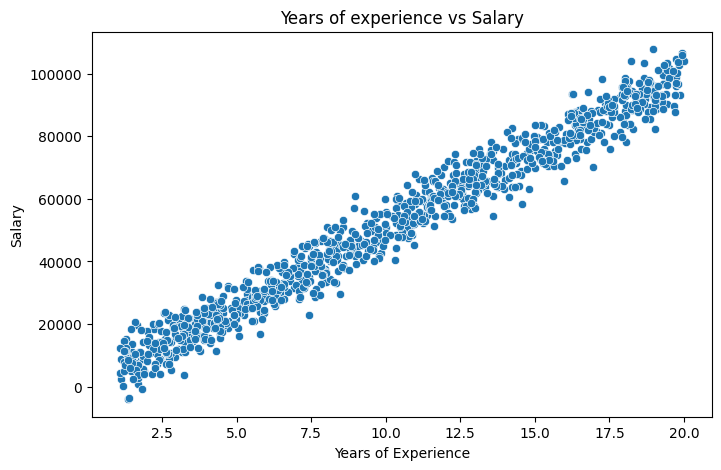

In [31]:
print(df.isnull().sum())

# plot data distribution
plt.figure(figsize=(8,5))
sns.scatterplot(x=df['YearsExperience'], y=df['Salary'])
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Years of experience vs Salary')
plt.show()


In [32]:
# Splitting the data into feature(x) and target variable(y)
x=df[['YearsExperience']] # independent variable
y=df['Salary'] # dependent variable

# Splitting into training(80%) and testing(20%) sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, train_size=0.8)

# Checking data split sizes
x_train.shape, x_test.shape

((800, 1), (200, 1))

In [33]:
# creating and training the simple linear regression model
model = LinearRegression()
model.fit(x_train, y_train)

print(f"Intercept: {model.intercept_}")
print(f"Coefficient: {model.coef_[0]}")

Intercept: 861.8378320342963
Coefficient: 4961.053263139448


In [34]:
Y_pred = model.predict(x_test)

results = pd.DataFrame({'Actual Salary': y_test.values, 'Predicted Salary': Y_pred})
results.head()

,Actual Salary,Predicted Salary
0,53047.803534,53159.798795
1,88539.137904,85870.699959
2,46424.209003,41225.344718
3,36960.442358,38649.455596
4,30715.255420,32571.611381


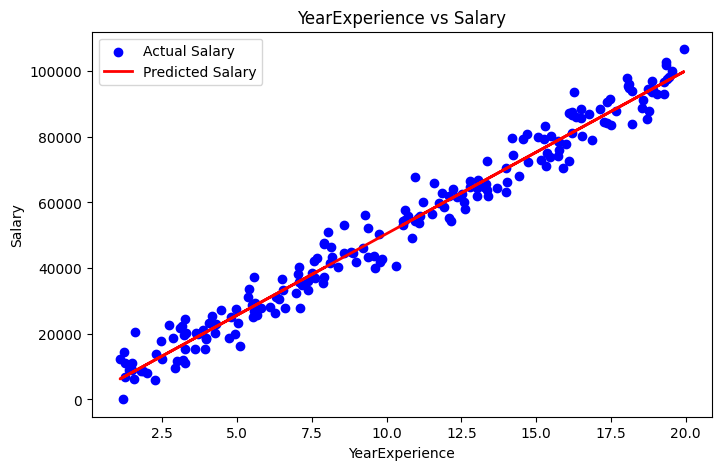

In [35]:
plt.figure(figsize=(8,5))
plt.scatter(x_test, y_test, color='blue', label='Actual Salary')
plt.plot(x_test, Y_pred, color='red', linewidth=2, label='Predicted Salary')
plt.xlabel('YearExperience')
plt.ylabel('Salary')
plt.title('YearExperience vs Salary')
plt.legend()
plt.show()

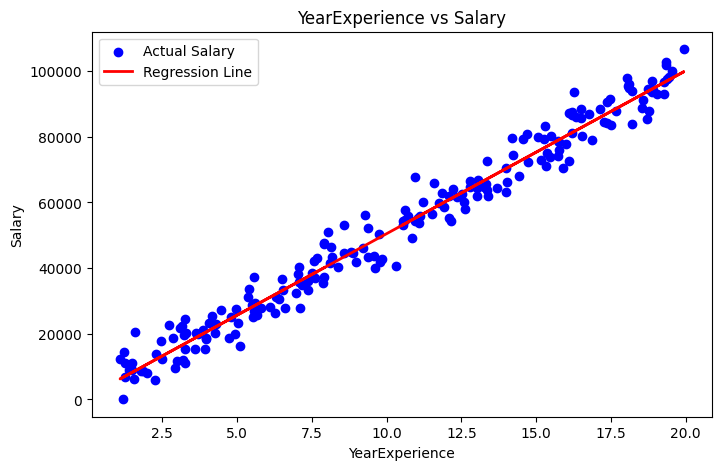

<Axes: xlabel='YearsExperience', ylabel='Salary'>

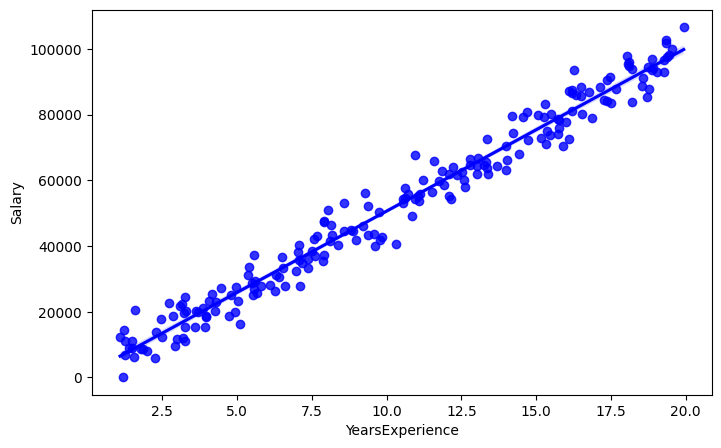

In [36]:
plt.figure(figsize=(8,5))
plt.scatter(x_test, y_test, color='blue', label='Actual Salary')
plt.plot(x_test, Y_pred, color='red', linewidth=2, label='Regression Line')
plt.xlabel('YearExperience')
plt.ylabel('Salary')
plt.title('YearExperience vs Salary')
plt.legend()
plt.show()

plt.figure(figsize=(8,5))
sns.regplot(x=x_test, y=y_test, color='blue', label='Actual Salary')

In [37]:
mae = mean_absolute_error(y_test, Y_pred)
mse = mean_squared_error(y_test, Y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, Y_pred)
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared: {r2}")

Mean Absolute Error: 3700.686756406191
Mean Squared Error: 21069151.945753828
Root Mean Squared Error: 4590.1145896103535
R-squared: 0.972922627699134


In [46]:
experience = float(input("Enter the years of experience: "))
if 0 <= experience <= 40:
    predicted_salary = model.predict([[experience]])[0]
    print(f"Predicted salary for {experience} years of experience: {predicted_salary}")

Enter the years of experience: 12
Predicted salary for 12.0 years of experience: 60394.47698970767


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
